In [2]:
suppressMessages(library(EpiModel))
suppressMessages(library(tidyverse))
library(rvest)
library(lubridate)
library(incidence)

In [40]:
# SEIR model
seir <- function(t, t0, parms){
    with(as.list(c(t0, parms)), {
        
        num <- s.num + e.num + i.num + r.num
        
        gamma <- 1 / i.dur
        beta <- R0 / i.dur
        lambda <- beta * i.num/num
        alpha <- 1 / e.dur # e.dur = serial interval
        
        dS <- -lambda * s.num
        dE <- lambda * s.num - alpha * e.num
        dI <- alpha * e.num - (1 - cfr) * gamma * i.num - cfr * gamma * i.num
        dR <- (1 - cfr) * gamma * i.num  + cfr * gamma * i.num
        
        list(c(dS, dE, dI, dR,
              se.flow = lambda * s.num,
              ei.flow = alpha * e.num,
              ir.flow = (1 - cfr)* gamma * i.num,
              id.flow = cfr * gamma * i.num),
            num = num,
            i.prev = i.num / num,
            ei.prev = (e.num + i.num) / num)
        
    })
}

Saving 6.67 x 6.67 in image


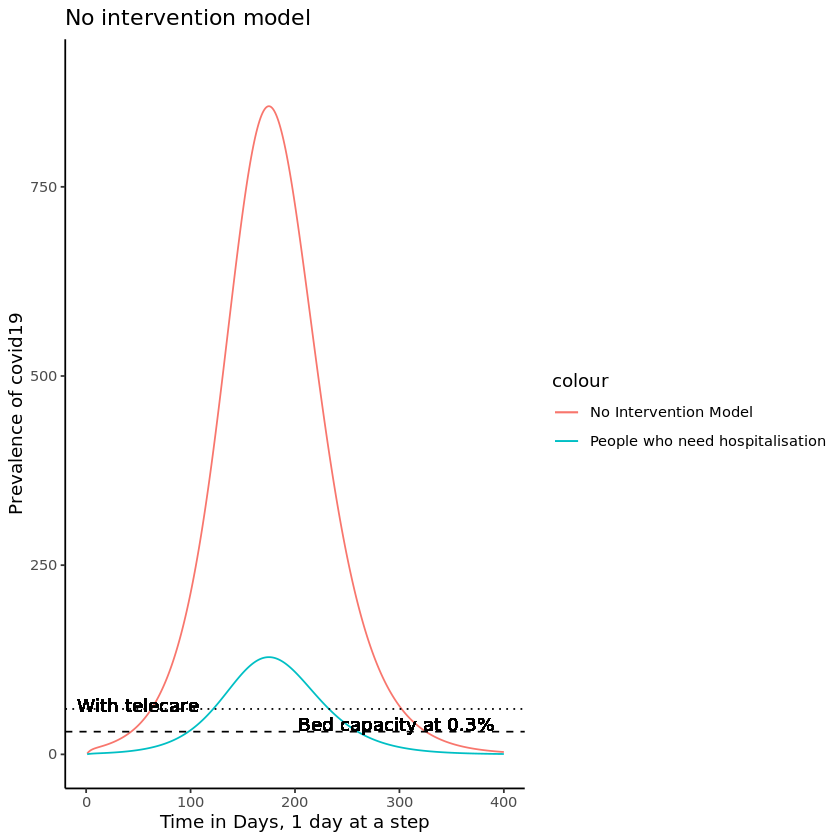

In [93]:
param <- param.dcm(R0 = 1.79, 
                  e.dur = 5,
                  i.dur = 14,
                  cfr = 0.002)

init <- init.dcm(s.num = 9989,
                  e.num = 10,
                  i.num = 1,
                  r.num = 0,
                se.flow = 0,
                 ei.flow = 0,
                ir.flow = 0,
                d.flow = 0)
control <- control.dcm(nsteps = 400,
                      new.mod = seir,
                      dt = 1)

mod1 <- dcm(param, init, control)
# plot(mod1, y = "i.num")
mod_df <- mod1 %>% as_tibble()
mod_df <- mod_df %>% 
mutate(hosp_srvc = 0.15 * i.num)

# mod_df %>% head()

mod_df %>% 
 ggplot(aes(x = time)) +
 geom_line(aes(y = i.num, colour = "No Intervention Model")) +
 geom_line(aes(y = hosp_srvc, colour = "People who need hospitalisation")) +
 ggtitle("No intervention model") +
 xlim(0, 400) +
 ylim(0, 900) +
 ylab("Prevalence of covid19") +
 xlab("Time in Days, 1 day at a step") +
 geom_hline(yintercept = 30, linetype = "dashed") +
 geom_hline(yintercept = 60, linetype = "dotted") +
 theme_classic() +
 geom_text(label = "Bed capacity at 0.3% ", 
          x = 300,
          y = 40)  +
 geom_text(label = "With telecare",
          x = 50,
          y = 65) +
 
 ggsave("no_intervention.jpg")

In [102]:
assumptions <- tribble(
~"Variable", ~"Description", ~"Values",
"R0", "Basic reproduction number", "1.97 without intervention",
" ", "Effective reproduction number", "1.50 with social distancing alone",
" ", "Effective reproduction number", "1.30 with lock down and social distancing",
"Serial Interval", "Interval in days between infection and infectivity", "5 days",
"Duration of infection", "How long does the infection last", "14 days",
"Case Fatality Ratio", "Number of people dead per confirmed case (%)", "0.2%"    
    
) %>%
write_csv("assumptions.csv")

Saving 6.67 x 6.67 in image


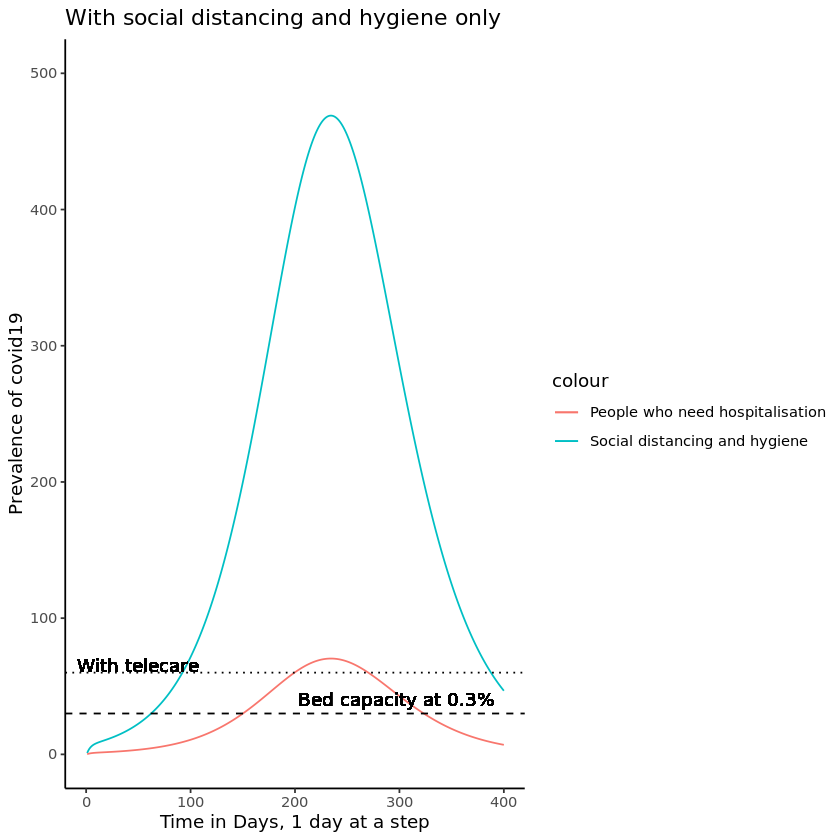

In [99]:
## what happens with only hand washing etc
param <- param.dcm(R0 = 1.50, 
                  e.dur = 5,
                  i.dur = 14,
                  cfr = 0.002)

init <- init.dcm(s.num = 9989,
                  e.num = 10,
                  i.num = 1,
                  r.num = 0,
                se.flow = 0,
                 ei.flow = 0,
                ir.flow = 0,
                d.flow = 0)
control <- control.dcm(nsteps = 400,
                      new.mod = seir,
                      dt = 1)

mod1 <- dcm(param, init, control)
# plot(mod1, y = "i.num")
mod_df <- mod1 %>% as_tibble()
mod_df <- mod_df %>% 
mutate(hosp_srvc = 0.15 * i.num)

# mod_df %>% head()

mod_df %>% 
 ggplot(aes(x = time)) +
 geom_line(aes(y = i.num, colour = "Social distancing and hygiene")) +
 geom_line(aes(y = hosp_srvc, colour = "People who need hospitalisation")) +
 ggtitle("With social distancing and hygiene only") +
 xlim(0, 400) +
 ylim(0, 500) +
 ylab("Prevalence of covid19") +
 xlab("Time in Days, 1 day at a step") +
 geom_hline(yintercept = 30, linetype = "dashed") +
 geom_hline(yintercept = 60, linetype = "dotted") +
 theme_classic() +
 geom_text(label = "Bed capacity at 0.3% ", 
          x = 300,
          y = 40)  +
 geom_text(label = "With telecare",
          x = 50,
          y = 65) +
 
 ggsave("hand_wash.jpg")


Saving 6.67 x 6.67 in image


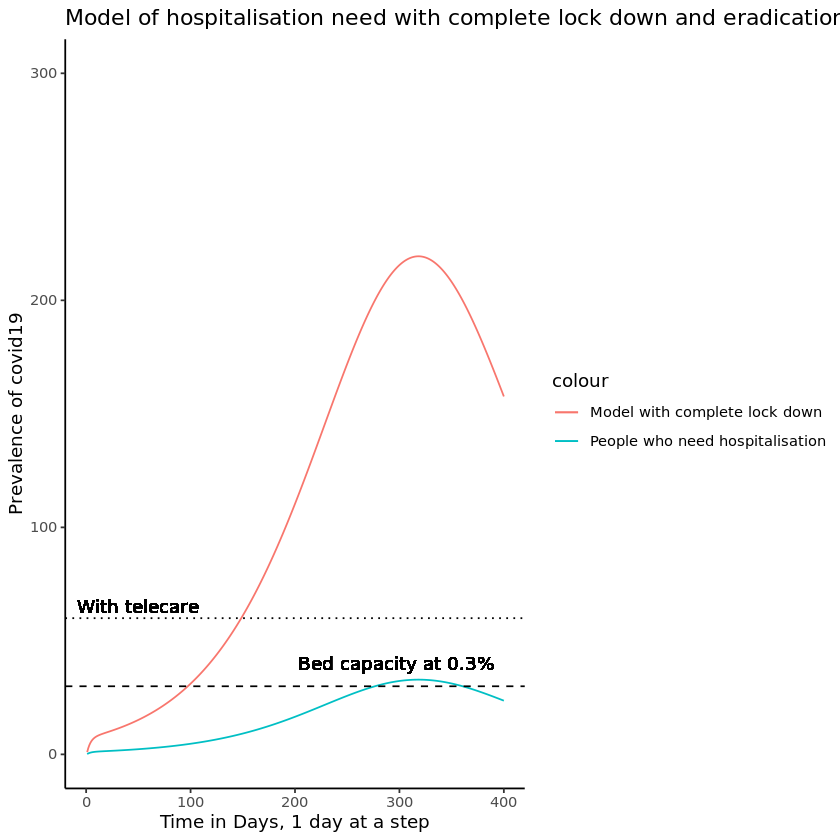

In [101]:
# lock down model

param <- param.dcm(R0 = 1.30, 
                  e.dur = 5,
                  i.dur = 14,
                  cfr = 0.002)

init <- init.dcm(s.num = 9989,
                  e.num = 10,
                  i.num = 1,
                  r.num = 0,
                se.flow = 0,
                 ei.flow = 0,
                ir.flow = 0,
                d.flow = 0)
control <- control.dcm(nsteps = 400,
                      new.mod = seir,
                      dt = 1)

mod1 <- dcm(param, init, control)
# plot(mod1, y = "i.num")
mod_df <- mod1 %>% as_tibble()
mod_df <- mod_df %>% 
mutate(hosp_srvc = 0.15 * i.num)

# mod_df %>% head()

mod_df %>% 
 ggplot(aes(x = time)) +
 geom_line(aes(y = i.num, colour = "Model with complete lock down")) +
 geom_line(aes(y = hosp_srvc, colour = "People who need hospitalisation")) +
 ggtitle("Model of hospitalisation need with complete lock down and eradication") +
 xlim(0, 400) +
 ylim(0, 300) +
 ylab("Prevalence of covid19") +
 xlab("Time in Days, 1 day at a step") +
 geom_hline(yintercept = 30, linetype = "dashed") +
 geom_hline(yintercept = 60, linetype = "dotted") +
 theme_classic() +
 geom_text(label = "Bed capacity at 0.3% ", 
          x = 300,
          y = 40)  +
 geom_text(label = "With telecare",
          x = 50,
          y = 65) +
 
 ggsave("lockdown.jpg")